HEART_DISEASE_PREDICTION


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("/content/heart.csv")

In [3]:
df. head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df["ST_Slope"].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df["Sex"].value_counts(normalize=True)# it is imbalance data  no need of smote technique if the target is imbalanc ewe use smote

,proportion
Sex,
1,0.78976
0,0.21024


In [ ]:
df["HeartDisease"].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


GENDER COUNT WHO HAVE DISEASE AND NORMAL

<Axes: xlabel='HeartDisease', ylabel='count'>

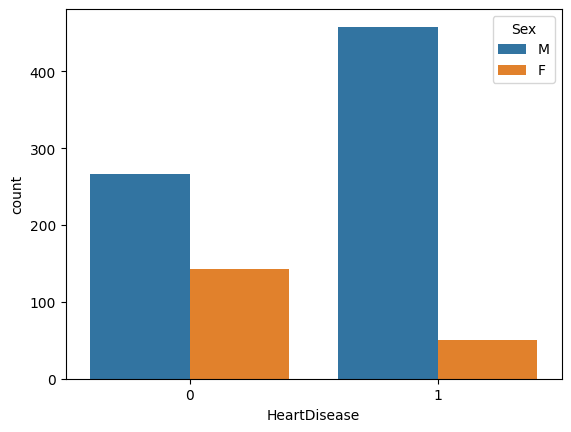

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="Sex")

In [ ]:
df.groupby("HeartDisease")["Sex"].value_counts()

HeartDisease  Sex
0             1      267
              0      143
1             1      458
              0       50
Name: count, dtype: int64

CHESTPAIN RELATION


<Axes: xlabel='HeartDisease', ylabel='count'>

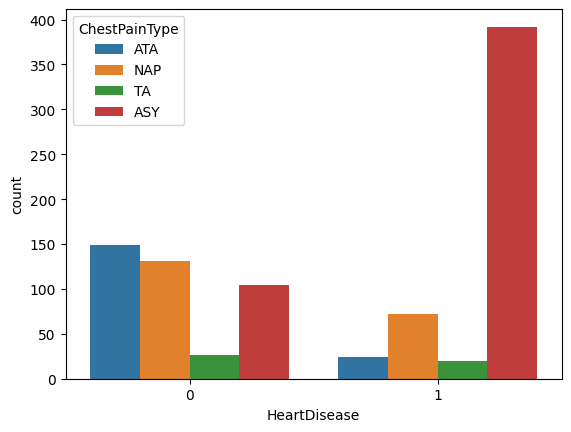

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="ChestPainType")     #asy lead to disease this feature have strong relation with target

RESTING_ECG RELATION

<Axes: xlabel='HeartDisease', ylabel='count'>

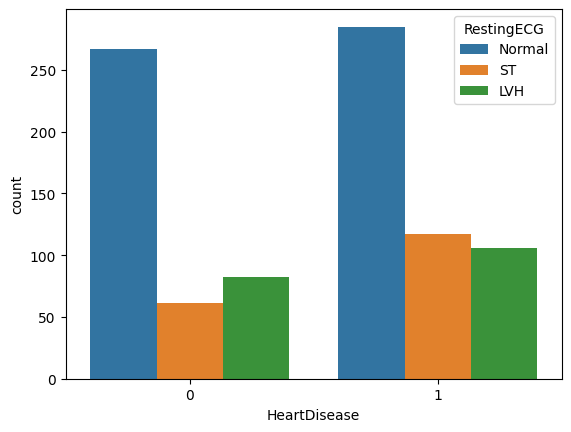

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="RestingECG")  #almost similar

In [ ]:
df.groupby("HeartDisease")["RestingECG"].value_counts()  # so it is not a strong feature

HeartDisease  RestingECG
0             Normal        267
              LVH            82
              ST             61
1             Normal        285
              ST            117
              LVH           106
Name: count, dtype: int64

ST_ SLOPE RELATION

<Axes: xlabel='HeartDisease', ylabel='count'>

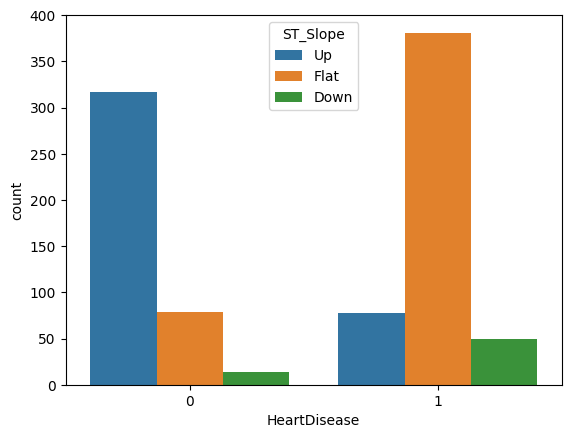

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="ST_Slope")  # flat leads to  disease

AGE ANALYSIS

<Axes: xlabel='Age', ylabel='Count'>

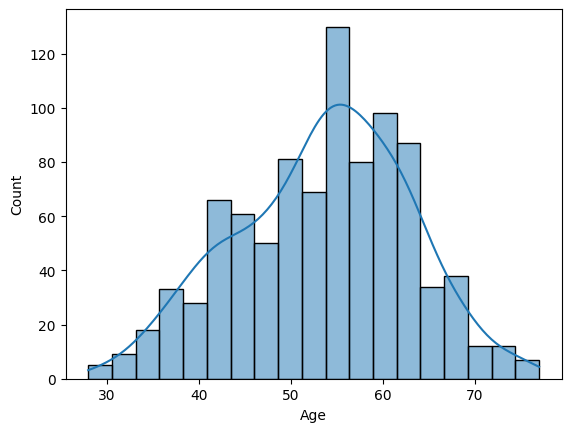

In [ ]:
sns.histplot(df["Age"],kde=True)

<Axes: >

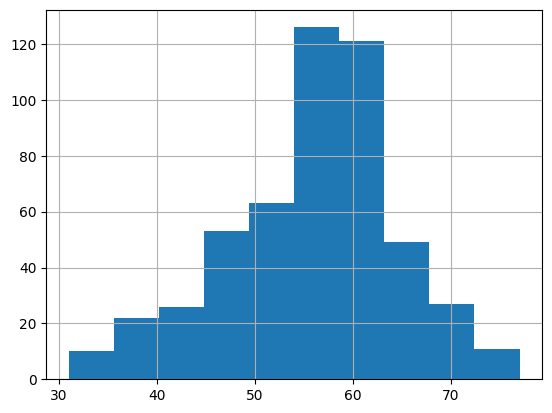

In [ ]:
df[df["HeartDisease"]==1]["Age"].hist()

<Axes: >

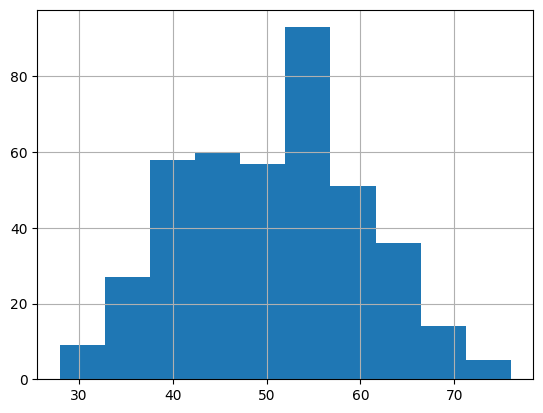

In [ ]:
df[df["HeartDisease"]==0]["Age"].hist()

In [ ]:
df[df[""]==1]["Age"].mean()

np.float64(55.8996062992126)

In [ ]:
df["Age"].std()

9.432616506732007

EXERCISEANGINA RELATION

<Axes: xlabel='HeartDisease', ylabel='count'>

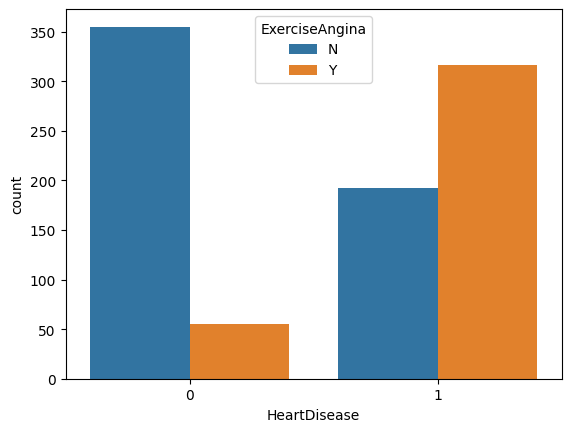

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="ExerciseAngina") #yes is low for 0

CHOLESTROL ANALYSIS

<Axes: >

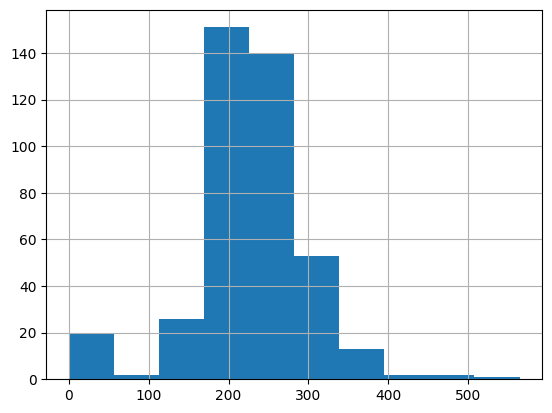

In [ ]:
df[df["HeartDisease"]==0]["Cholesterol"].hist()

<Axes: >

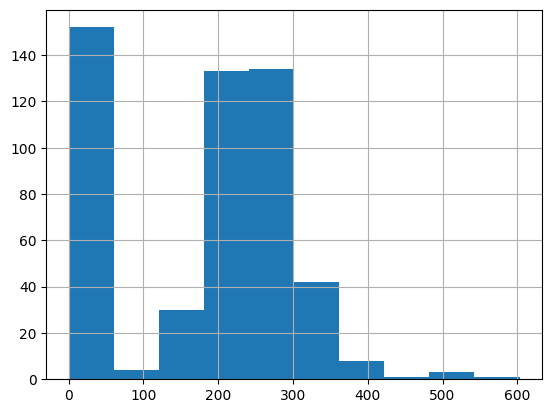

In [ ]:
df[df["HeartDisease"]==1]["Cholesterol"].hist()   #200-300 and low level cause disease

In [ ]:
df.groupby("HeartDisease")["Cholesterol"].agg(["min","max","median"])

,min,max,median
HeartDisease,,,
0,0,564,227.0
1,0,603,217.0


In [ ]:
df[df["HeartDisease"]==1]["Cholesterol"].mean()

np.float64(175.94094488188978)

In [ ]:
df.groupby("HeartDisease")["Age"].mean()

,Age
HeartDisease,
0,50.551220
1,55.899606


RELATION BETWEEN HEARTRATE AND DISEASE

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

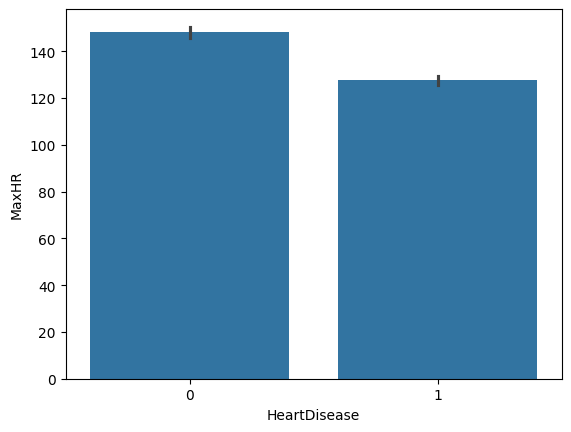

In [ ]:
sns.barplot(x="HeartDisease",y="MaxHR",data=df)  # NOT THAT MUCH DIFFERENCE NO RELATION

In [ ]:
df["HeartDisease"].corr(df["MaxHR"])

np.float64(-0.40042076946318983)

DOES FASTING BLOOD SUGAR RELATE DISEASE

In [ ]:
df["HeartDisease"].corr(df["FastingBS"])

np.float64(0.2672911861102978)

<Axes: xlabel='HeartDisease', ylabel='FastingBS'>

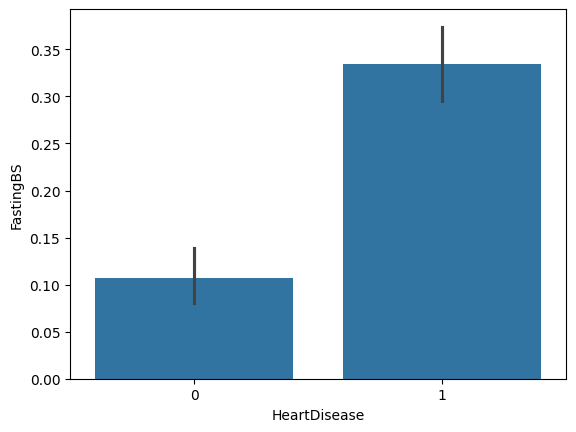

In [ ]:
sns.barplot(x="HeartDisease",y="FastingBS",data=df)

In [ ]:
df["FastingBS"].max()

1

In [ ]:
df.groupby("HeartDisease")["FastingBS"].value_counts()

HeartDisease  FastingBS
0             0            366
              1             44
1             0            338
              1            170
Name: count, dtype: int64

In [ ]:
df["FastingBS"].unique()

array([0, 1])

AVERAGE RESTING BLOOD PRESSURE

In [ ]:
df["RestingBP"].mean()

np.float64(132.39651416122004)

In [4]:
df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [6]:
df["Oldpeak"]=df["Oldpeak"].abs()#can't be negative number

In [7]:
df["Oldpeak"].unique()

array([0. , 1. , 1.5, 2. , 3. , 4. , 0.5, 2.5, 5. , 0.8, 0.7, 1.4, 2.1,
       0.4, 0.2, 1.7, 2.2, 0.1, 1.6, 1.3, 0.3, 1.8, 2.6, 0.9, 2.8, 1.1,
       2.4, 3.7, 1.2, 1.9, 3.5, 0.6, 3.1, 2.3, 3.4, 3.6, 4.2, 3.2, 5.6,
       3.8, 2.9, 6.2, 4.4])

<ipython-input-58-6271253b6535>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x="HeartDisease",data=df,hue="Oldpeak",color="red")


<Axes: xlabel='HeartDisease', ylabel='count'>

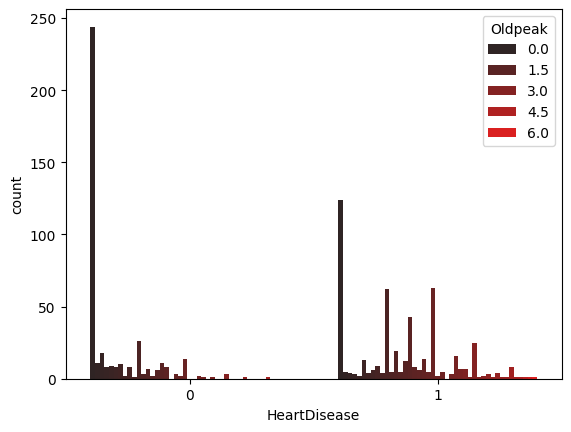

In [ ]:
sns.countplot(x="HeartDisease",data=df,hue="Oldpeak",color="red")

OUTLIERS

<Axes: >

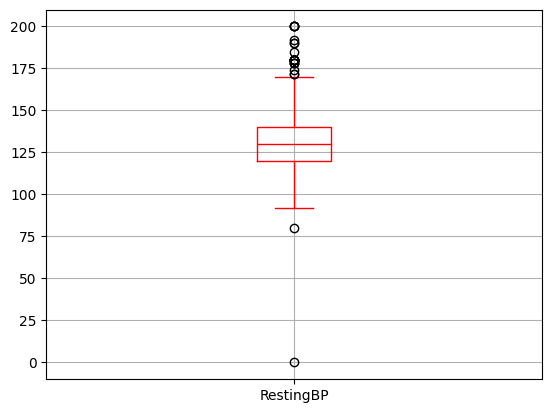

In [ ]:
df.boxplot("RestingBP",color="red")

<Axes: >

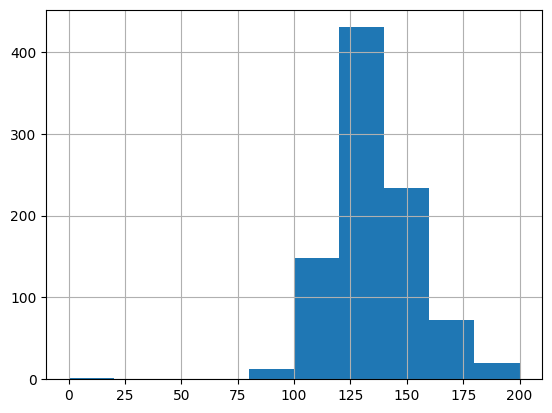

In [ ]:
df["RestingBP"].hist()

<Axes: >

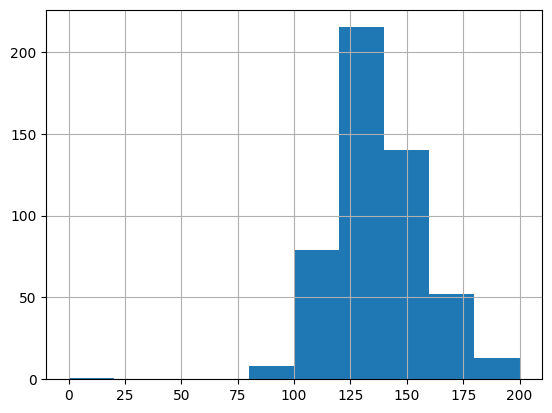

In [ ]:
df[df["HeartDisease"]==1]["RestingBP"].hist()

<Axes: >

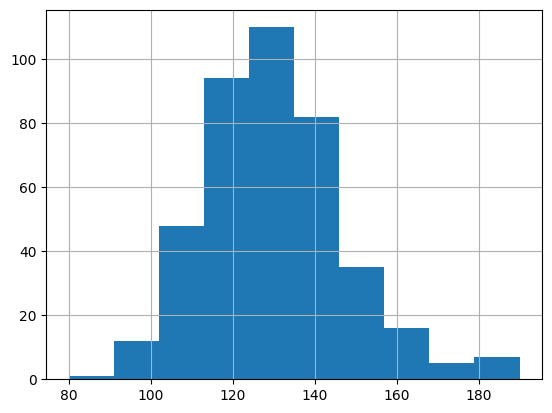

In [ ]:
df[df["HeartDisease"]==0]["RestingBP"].hist()

In [ ]:
df["HeartDisease"].corr(df["RestingBP"])*100

np.float64(10.758898037140373)

In [ ]:
df["RestingBP"].tail()

,RestingBP
913,110
914,144
915,130
916,130
917,138


MODEL

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ST_Slope"]=le.fit_transform(df[["ST_Slope"]])
df["RestingECG"]=le.fit_transform(df[["RestingECG"]])
df["ChestPainType"]=le.fit_transform(df[["ChestPainType"]])
df["ExerciseAngina"]=le.fit_transform(df[["ExerciseAngina"]])
df["Sex"]=le.fit_transform(df[["Sex"]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#df["Oldpeak"]=sc.fit_transform(df[["Oldpeak"]])


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

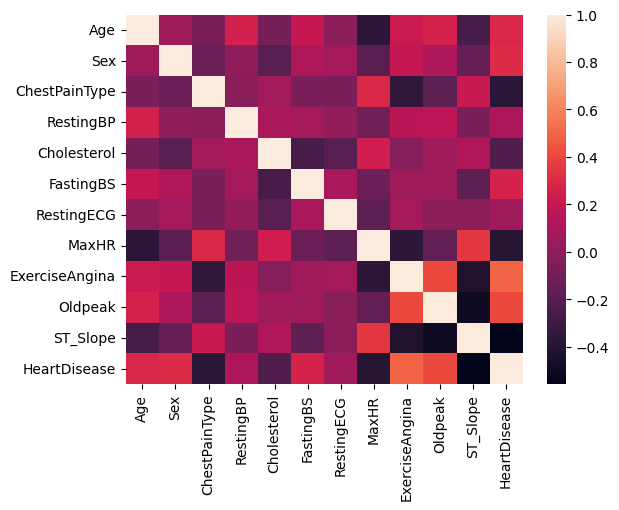

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [9]:
x=df.drop(columns=["HeartDisease"])
y=df["HeartDisease"]

In [10]:
print("Input ", x)

Input       Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slop

In [11]:
print("Output ", y)

Output  0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [16]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_predict=model.predict(x_test)
print ("y_predict ", y_predict)

y_predict  [1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0]


In [18]:
y_train_predict=model.predict(x_train)
print ("y_train_predict ", y_train_predict)

y_train_predict  [0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 0

In [19]:

from sklearn.metrics import accuracy_score
print ("Accuracy", accuracy_score (y_train_predict,y_train))

Accuracy 0.8623978201634878


In [20]:
print ("Accuracy", accuracy_score (y_test,y_predict))

Accuracy 0.8315217391304348


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[72 15]
 [16 81]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        87
           1       0.84      0.84      0.84        97

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [26]:
sex_map = {'M': 1, 'F': 0}
chest_pain_map = {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}
resting_ecg_map = {'NORMAL': 0, 'ST': 1, 'LVH': 2}
exercise_angina_map = {'Y': 1, 'N': 0}
slope_map = {'UP': 0, 'FLAT': 1, 'DOWN': 2}

In [31]:
age = int(input("Enter Age: "))
sex = sex_map[input("Enter Sex (M/F): ").strip().upper()]
chest_pain = chest_pain_map[input("Enter Chest Pain Type (TA/ATA/NAP/ASY): ").strip().upper()]
resting_bp = int(input("Enter Resting Blood Pressure: "))
cholesterol = int(input("Enter Cholesterol: "))
fasting_bs = int(input("Enter Fasting Blood Sugar (0 or 1): "))
resting_ecg = resting_ecg_map[input("Enter Resting ECG (Normal/ST/LVH): ").strip().upper()]
max_hr = int(input("Enter Max Heart Rate: "))
exercise_angina = exercise_angina_map[input("Exercise Induced Angina? (Y/N): ").strip().upper()]
oldpeak = float(input("Enter Oldpeak value (it should be between 0and 6): "))
st_slope = slope_map[input("Enter ST Slope (Up/Flat/Down): ").strip().upper()]




Enter Age: 34
Enter Sex (M/F): f
Enter Chest Pain Type (TA/ATA/NAP/ASY): asy
Enter Resting Blood Pressure: 34
Enter Cholesterol: 232
Enter Fasting Blood Sugar (0 or 1): 1
Enter Resting ECG (Normal/ST/LVH): st
Enter Max Heart Rate: 120
Exercise Induced Angina? (Y/N): n
Enter Oldpeak value (it should be between 0and 6): 2
Enter ST Slope (Up/Flat/Down): flat


In [32]:
user_input = np.array([[age, sex, chest_pain, resting_bp, cholesterol,
                        fasting_bs, resting_ecg, max_hr,
                        exercise_angina, oldpeak, st_slope]])


In [33]:
prediction = model.predict(user_input)
print("\nPrediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")



Prediction: No Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SAVE MODEL

In [34]:
import pickle
# Save the best model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [35]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MY OBSERVATION

1.Males are more commonly affected by heart disease compared to females.

2.Individuals with asymptomatic chest pain (type: 'asy') tend to have a higher risk of heart disease.

3.The presence of exercise-induced angina is usually associated with the presence of heart disease.

4.An oldpeak value greater than 2 often indicates a higher likelihood of heart disease.

5.If the fasting blood sugar (fbs) is greater than 120 mg/dl (i.e., fbs = 1), the person is more likely to have heart disease.

6.A flat slope of the ST segment (i.e., slope = flat) is commonly seen in patients with heart disease.

7.High cholesterol levels increase the risk of heart disease. In general, cholesterol levels:

Between 125–200 mg/dl are considered normal,

Between 200–239 mg/dl indicate borderline risk,

240 mg/dl or more suggest a high risk.

8.A lower maximum heart rate achieved (maxhr) is often linked to heart disease, while higher values are generally healthier.

9.Age does play a role, but in this dataset, it does not appear to be a major factor.

10.Certain resting electrocardiogram (ECG) results are also associated with the presence of heart disease.

11.Restingbp does play a role, but in this dataset,very weak correlated it does not appear to be a major factor.
